<a href="https://colab.research.google.com/github/ryan-merser/ST554-BigData/blob/main/HW4_ST554.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ST 554 Homework 4
Ryan Mersereau

## Homework 3 Variable summaries

Categorical variables

Start by reading in the StudentData text file and checking out the first few observations of the data

In [1]:
import pandas as pd
student_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep = ";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Now lets summarize the data!

Create a one-way, two-way, and three-way contingency table and interpret a value from each table

In [3]:
# One-way
student_data["dummy"] = 0
pd.crosstab(index = student_data.sex, columns = student_data.dummy)

dummy,0
sex,
F,208
M,187


This is a one-way contingency table on students by sex. For example, the number 208 represents there are 208 female students in this dataset.

In [3]:
# Two-way
twoway_tab = pd.crosstab(index = student_data.sex, columns = student_data.guardian)
twoway_tab

guardian,father,mother,other
sex,,,
F,43,145,20
M,47,128,12


This is a two-way contingency table on students by sex and their guardian. For example, the number 47 represents there are 47 male students who also have their father listed as their guardian.

In [ ]:
# Three-way
my_tab = pd.crosstab(index = student_data.sex, columns = [student_data.guardian, student_data.address], margins = True)
my_tab

guardian father     mother      other      All
address       R   U      R    U     R   U     
sex                                           
F             8  35     33  112     3  17  208
M             7  40     34   94     3   9  187
All          15  75     67  206     6  26  395

This is a three-way contingency table on students by sex and their guardian, split up by whether their home address is in a Rural(R) or Urban(U) area. For example, there are 35 female students who have their father listed as their guardian, who also live in an urban area.

Now, let's create a conditional two-way table using two different methods:
* Subsetting with .loc
* Creating a three-way table and subsetting

In [ ]:
fatherguard_tab = student_data.loc[(student_data.guardian == "father")]
fatherguard_tab.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dummy
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
11,GP,F,15,U,GT3,T,2,1,services,other,...,2,2,1,1,4,4,10,12,12,0
12,GP,M,15,U,LE3,T,4,4,health,services,...,3,3,1,3,5,2,14,14,14,0
19,GP,M,16,U,LE3,T,4,3,health,other,...,1,3,1,3,5,4,8,10,10,0


In [ ]:
pd.crosstab(index = fatherguard_tab.sex, columns = fatherguard_tab.address, margins = True)


address,R,U,All
sex,,,
F,8,35,43
M,7,40,47
All,15,75,90


This is a two-way way table between student sex and address conditioned on the students guardian being their father first.

In [ ]:
my_tab["father"]

address,R,U
sex,,
F,8,35
M,7,40
All,15,75


This is the same table, generated by subsetting the three-way table to only include students with their father as the guardian

Numeric Variables

The numeric variables are age, absences, and the three test grade variables G1, G2, and G3.

Let's start by finding measures of center and spread for three of these variables

In [ ]:
# Mean age
print(student_data.age.mean())

np.float64(16.696202531645568)

In [ ]:
# Standard deviation of age
student_data.age.std()

1.2760427246056245

In [ ]:
# Mean of G1
print(student_data.G1.mean())

np.float64(10.90886075949367)

In [ ]:
# Standard deviation of G1
student_data.G1.std()

3.3191946715076686

In [ ]:
# Mean of G3
print(student_data.G3.mean())

np.float64(10.415189873417722)

In [ ]:
# Standard deviation of G3
student_data.G3.std()

4.5814426109978434

Now, lets repeat while subsetting the data using `.loc[]`, for example, lets subset for only male students

In [ ]:
male_tab = student_data.loc[(student_data.sex == "M")]
male_tab.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,dummy
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,0
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,0
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,0
12,GP,M,15,U,LE3,T,4,4,health,services,...,3,3,1,3,5,2,14,14,14,0


In [ ]:
# Mean age (males)
print(male_tab.age.mean())

16.657754010695186


In [ ]:
# Standard deviation of age (males)
male_tab.age.std()

1.3561811038632565

In [ ]:
# Mean of G1 (males)
print(male_tab.G1.mean())

11.229946524064172


In [ ]:
# Standard deviation of G1 (males)
male_tab.G1.std()

3.392838995404565

In [ ]:
# Mean of G3 (males)
print(male_tab.G3.mean())

10.914438502673796


In [ ]:
# Standard deviation of G3 (males)
male_tab.G3.std()

4.495296834986383

Now, lets find measures of center and spread across a single grouping variable. For example, lets subset by gender

In [ ]:
# Mean
student_data.groupby("sex")[["age", "G1", "G3"]].mean()

,age,G1,G3
sex,,,
F,16.730769,10.620192,9.966346
M,16.657754,11.229947,10.914439


In [ ]:
# Standard deviation
student_data.groupby("sex")[["age", "G1", "G3"]].std()

,age,G1,G3
sex,,,
F,1.201696,3.232530,4.622338
M,1.356181,3.392839,4.495297


Now, lets repeat across two grouping variables. For example, gender and address

In [ ]:
# Mean
student_data.groupby(["sex", "address"])[["absences","G1", "G3"]].mean()

absences         G1         G3
sex address                                
F   R        7.454545  10.295455   9.272727
    U        5.884146  10.707317  10.152439
M   R        4.795455  10.659091   9.750000
    U        5.251748  11.405594  11.272727

In [ ]:
# Standard deviation
student_data.groupby(["sex", "address"])[["absences", "G1", "G3"]].std()

absences        G1        G3
sex address                               
F   R        12.704979  3.137022  4.447961
    U         8.378617  3.261554  4.663649
M   R         4.521677  3.703821  4.700940
    U         6.372773  3.285130  4.384964

Finally, lets create a correlation matrix between all of the numeric variables

In [ ]:
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


# Summarizing Student Data Graphically

## Task 1: Categorical Variables

Create a stacked bar graph and a side-by-side bar graph. Give relevant $x$ and $y$ labels, and a title for
the plots

Lets do this for the two-way table

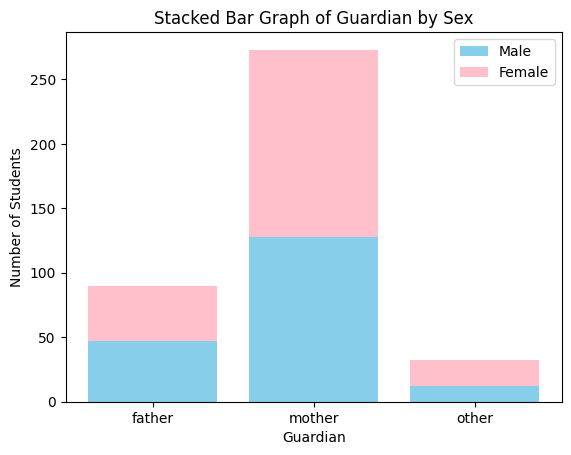

In [4]:
# Stacked bar graph
import matplotlib.pyplot as plt
plt.bar(
    x = twoway_tab.columns,
    height = twoway_tab.loc['M'],
    label = 'Male',
    color = 'skyblue'
)
plt.bar(
    x = twoway_tab.columns,
    height = twoway_tab.loc['F'],
    bottom = twoway_tab.loc['M'],
    label = 'Female',
    color = 'pink'
)
plt.xlabel("Guardian")
plt.ylabel("Number of Students")
plt.title("Stacked Bar Graph of Guardian by Sex")
plt.legend(loc= 0)

The overwhelming majority of students have their mother listed as their guardian. Additionally, for those with their father listed, the majority of students are male

Text(0.5, 1.0, 'Side-by-Side Bar Graph of Guardian by Sex')

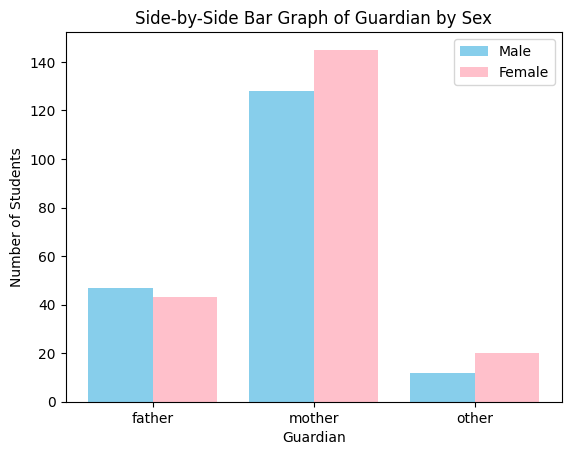

In [22]:
# Side-by-side bar graph
plt.bar(
    x = [1,2,3],
    height = twoway_tab.loc['M'],
    label = 'Male',
    color = 'skyblue',
    width = 0.4)
plt.bar(
    x = [1.4 , 2.4, 3.4],
    height = twoway_tab.loc['F'],
    width = 0.4,
    label = 'Female',
    color = 'pink')
plt.xticks([1.2, 2.2, 3.2], twoway_tab.columns)
plt.xlabel("Guardian")
plt.ylabel("Number of Students")
plt.legend(loc=0)
plt.title("Side-by-Side Bar Graph of Guardian by Sex")

Again we can see the same thing as above, there are more female students with mother guardians than male students with mother guardians. However, there are more male students with father guardians than female students with father guardians.

## Numeric Variables

Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the
categorical variables (that is, create graphs that can compare the distributions across the groups). For
at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the
same plot. Add appropriate labels and titles.

Graphs for G1 across sex

In [36]:
# First create subsets of the data
G1_male = student_data.loc[student_data.sex == "M", "G1"]
G1_female = student_data.loc[student_data.sex == "F", "G1"]

# Define bins
bin_ends = 20
bins = [i*max(student_data.G1)/bin_ends for i in range(0, bin_ends + 1)]
print(bins)

[0.0, 0.95, 1.9, 2.85, 3.8, 4.75, 5.7, 6.65, 7.6, 8.55, 9.5, 10.45, 11.4, 12.35, 13.3, 14.25, 15.2, 16.15, 17.1, 18.05, 19.0]


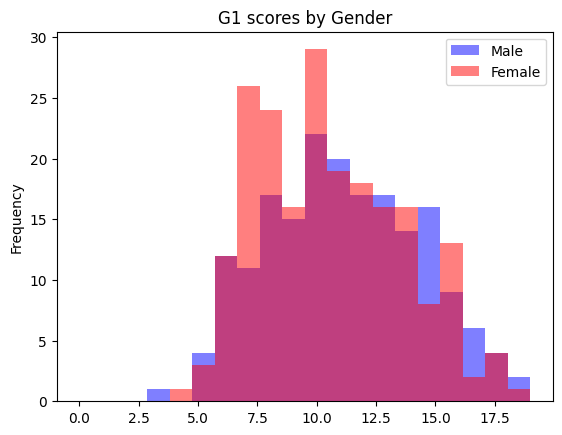

In [37]:
# Histogram of G1 score distribution by gender
G1_male.plot.hist(bins = bins, alpha = 0.5, label = "Male", color = "blue", title = "G1 scores by Gender") \
  .set(xlabel = "G1 Score")
G1_female.plot.hist(bins = bins, alpha = 0.5, label = "Female", color = "red")
plt.legend()

Male and Female G1 scores seem to overlap well, centered around a score of 12. Although there appears to be slightly more blue (male) on the right side and red (female) on the left side, suggesting the histogram of the male students may be centered slightly more to the right than the histogram of female students.

Text(0.5, 1.0, 'Kernel Density Plot of G1 Scores by Gender')

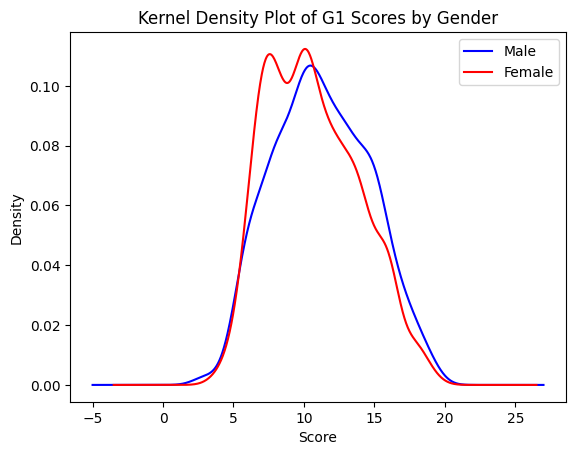

In [42]:
# Kernel density plot of G1 scores by Gender
G1_male.plot.density(bw_method = 0.25, label = "Male", color = "blue") \
  .set(xlabel = "Score")
G1_female.plot.density(bw_method = 0.25, label = "Female", color = "red")
plt.legend(["Male", "Female"])
plt.title("Density Plot of G1 Scores by Gender")

For this level of smoothness, the female density plot appears to have to possible maximums. Also, the female plot may be slightly skewed right compared to the male plot which seems more gaussian.

Text(0, 0.5, 'Score')

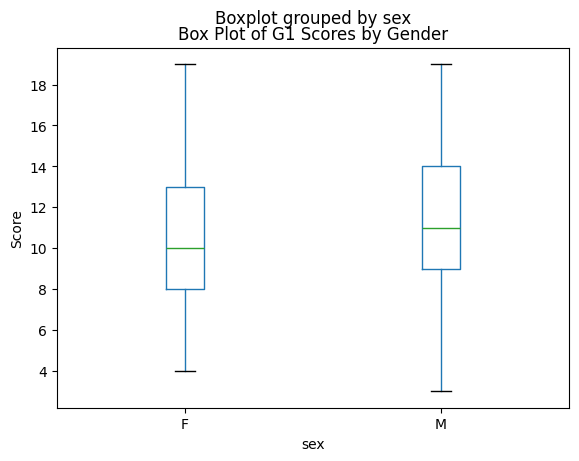

In [43]:
# Box Plot of G1 Scores by Gender
student_data.boxplot(column = "G1", by = "sex", grid = False)
plt.title("Box Plot of G1 Scores by Gender")
plt.ylabel("Score")


We can see from these boxplots that male students have a higher mean score on G1 than female students. Male students also have a higher Q1 and Q3 value, but a lower minimum.

Now, lets make three additional graphs for G3 scores across whether the student has internet access at home or not



In [56]:
# First create subsets of the data
G3_yes = student_data.loc[student_data.internet == "yes", "G3"]
G3_no = student_data.loc[student_data.internet == "no", "G3"]

# Define bins
bin_ends = 20
bins = [i*max(student_data.G3)/bin_ends for i in range(0, bin_ends + 1)]
print(bins)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


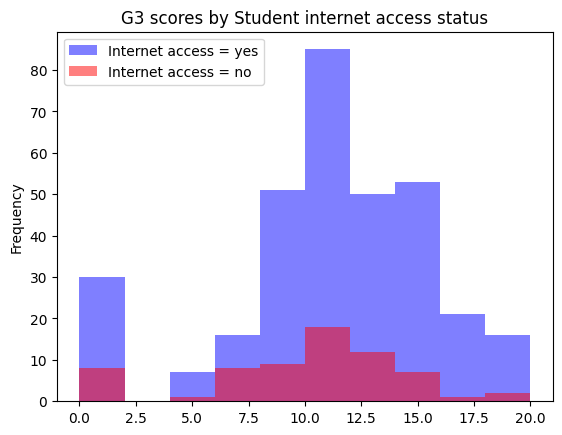

In [55]:
# Histogram of G3 score distribution by internet access
G3_yes.plot.hist(bins = bins, alpha = 0.5, label = "Internet access = yes", color = "blue", title = "G3 scores by Student internet access status") \
  .set(xlabel = "G3 Score")
G3_no.plot.hist(bins = bins, alpha = 0.5, label = "Internet access = no", color = "red")
plt.legend()

We can see that many more students have internet access at home vs those that dont, but there isn't an obvious difference in mean and spread between the two groups

Text(0.5, 1.0, 'Density Plot of G3 Scores by Internet access status')

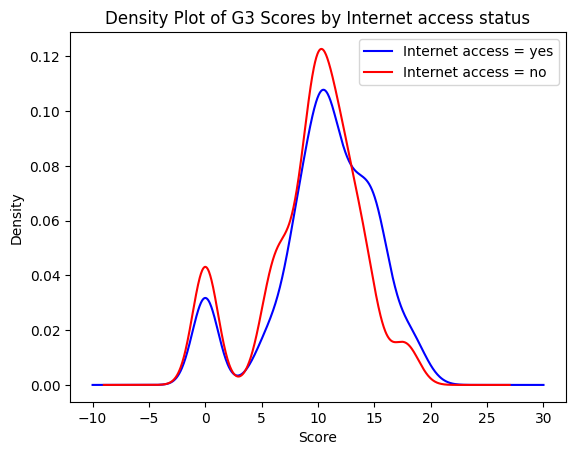

In [53]:
# Kernel density plot of G3 scores by Internet access
G3_yes.plot.density(bw_method = 0.25, label = "Internet access = yes", color = "blue") \
  .set(xlabel = "Score")
G3_no.plot.density(bw_method = 0.25, label = "Internet access = no", color = "red")
plt.legend()
plt.title("Density Plot of G3 Scores by Internet access status")

We can see that at this smoothness, the distributions follow each other very closely. There is also a spike at 0 for both groups, indicating that there were a few students who received a 0 on the G3 exam.

Text(0, 0.5, 'Score')

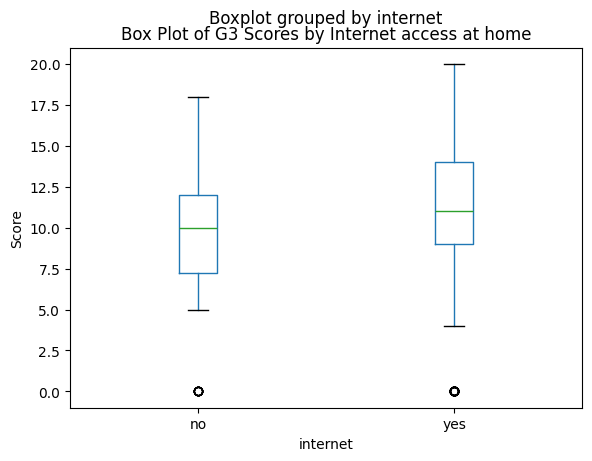

In [57]:
# Box Plot of G3 Scores by Internet access
student_data.boxplot(column = "G3", by = "internet", grid = False)
plt.title("Box Plot of G3 Scores by Internet access at home")
plt.ylabel("Score")

These boxplots are similar, but now we see some separation, with the mean, Q1, and Q3 on G3 for those with internet access being slightly higher than those without. The range for those without internet is smaller, and there are outliers in both groups for those who received a 0.

Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by
a categorical variable in each. Add appropriate labels and titles.

<Figure size 1000x600 with 0 Axes>

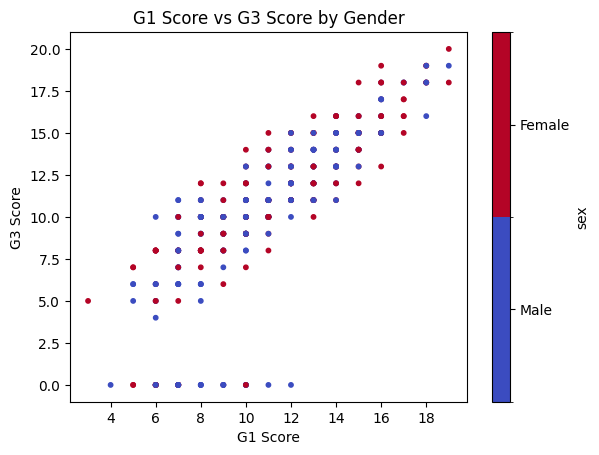

In [69]:
# Plot of G1 vs G3 score by Gender

# Convert sex column to categorical representation
student_data["sex"] = student_data.sex.astype("category")
student_data.sex = student_data.sex.cat.rename_categories(["Male", "Female"])

# Plot
plt.figure(figsize=(10, 6))
student_data.plot.scatter(
    x = "G1",
    y = "G3",
    c = "sex",
    cmap = "coolwarm",
    s = 10,
)
plt.ylabel("G3 Score")
plt.xlabel("G1 Score")
plt.title("G1 Score vs G3 Score by Gender")
plt.show()

This scatterplot appears to have a strong positive linear association. Meaning regardless of gender, students performance on G3 tends to follow their performance on G1

<Figure size 1000x600 with 0 Axes>

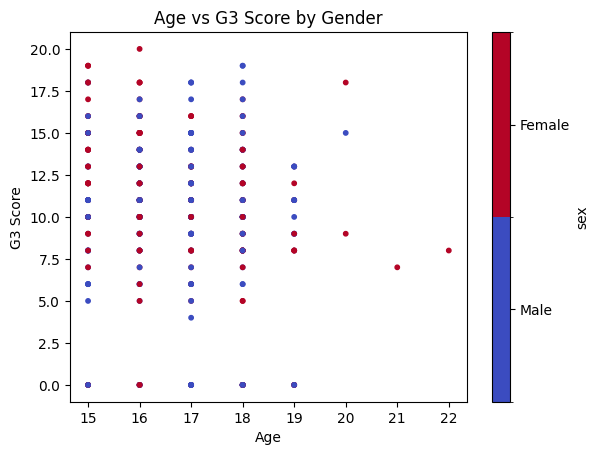

In [71]:
# Plot of G3 score vs Age by Gender

plt.figure(figsize=(10, 6))
student_data.plot.scatter(
    x = "age",
    y = "G3",
    c = "sex",
    cmap = "coolwarm",
    s = 10,
)
plt.ylabel("G3 Score")
plt.xlabel("Age")
plt.title("Age vs G3 Score by Gender")
plt.show()

Age does not seem to have a strong association with G3 score, with large variance in scores. There are also very few 20+ year olds in this data.

# Plotting NFL Data

## Task 1: Reading in Data

In [7]:
nfl_data = pd.read_csv("scoresFull.csv")
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


Convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category type variables

In [8]:
nfl_data["homeTeam"] = nfl_data.homeTeam.astype("category")
nfl_data["awayTeam"] = nfl_data.awayTeam.astype("category")
nfl_data["day"] = nfl_data.day.astype("category")
nfl_data["stadium"] = nfl_data.stadium.astype("category")
nfl_data["startTime"] = nfl_data.startTime.astype("category")
nfl_data["toss"] = nfl_data.toss.astype("category")
nfl_data["roof"] = nfl_data.roof.astype("category")
nfl_data["surface"] = nfl_data.surface.astype("category")

## Task 2: Summarizing data

To start, we'll focus on the regular season, this means we should remove any data where the week isn't 1-17

In [9]:
import numpy as np

# Convert week column to numeric, coercing errors to NaN
nfl_data['week'] = pd.to_numeric(nfl_data['week'], errors='coerce')
nfl_data['week'] = nfl_data['week'].fillna(99) # Fill playoff weeks with 99 to exclude
nfl_data['week'] = nfl_data['week'].astype(int)

# Filter for regular season weeks (1-17)
nfl_regseason = nfl_data.loc[nfl_data.week <= 17]
nfl_regseason.tail()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
3455,17,28-Dec,Sun,2014,Chicago Bears,0,3,3,3,-1,...,0,4,25,8,15,0,1,28.45,4,7.0
3456,17,28-Dec,Sun,2014,San Diego Chargers,0,7,0,0,-1,...,0,7,46,2,12,0,0,28.65,12,2.5
3457,17,28-Dec,Sun,2014,Oakland Raiders,7,0,7,0,-1,...,1,1,16,7,15,1,1,33.02,33,14.0
3458,17,28-Dec,Sun,2014,Indianapolis Colts,7,10,0,10,-1,...,1,4,20,4,16,1,3,26.57,-17,-7.5
3459,17,28-Dec,Sun,2014,Buffalo Bills,7,10,0,0,-1,...,0,5,55,5,15,1,3,30.95,-8,6.5


Now, summarize some of the variables grouped by 1) season and week, 2) season alone, and 3) week alone.

Produce some common numeric summaries of variables across these different groups

Similarly, produce some common plots over time (line plots)

In [12]:
# Lets start by looking at mean home and away total yards, home and away passing touchdowns, and home and away interceptions, grouped by season and week
nfl_regseason.groupby(["season", "week"])[["HtotalYds", "AtotalYds", "homePassTD", "awayPassTD", "homePassInt", "awayPassInt"]].mean()
# Mean

HtotalYds   AtotalYds  homePassTD  awayPassTD  homePassInt  \
season week                                                                
2002   1     348.625000  310.000000    1.937500    1.375000     0.937500   
       2     306.812500  340.937500    1.250000    1.312500     1.000000   
       3     322.571429  299.214286    1.642857    1.285714     1.000000   
       4     346.857143  344.071429    1.785714    1.142857     0.500000   
       5     341.571429  379.571429    1.571429    2.000000     1.571429   
...                 ...         ...         ...         ...          ...   
2014   13    347.375000  346.375000    1.812500    1.562500     0.812500   
       14    308.937500  392.437500    1.375000    1.875000     0.875000   
       15    301.625000  327.375000    1.125000    0.812500     0.937500   
       16    324.375000  368.625000    1.500000    1.625000     0.750000   
       17    349.187500  330.687500    1.062500    1.375000     0.687500   

             awayPassInt  
season week               
2002   1        0.937500  
       2        1.000000  
       3        1.428571  
       4        2.000000  
       5        1.000000  
...                  ...  
2014   13       1.125000  
       14       0.875000  
       15       0.625000  
       16       1.250000  
       17       1.000000  

[221 rows x 6 columns]

In [17]:
# Standard deviation by week and season
nfl_regseason.groupby(["season", "week"])[["HtotalYds", "AtotalYds", "homePassTD", "awayPassTD", "homePassInt", "awayPassInt"]].std()

HtotalYds   AtotalYds  homePassTD  awayPassTD  homePassInt  \
season week                                                                
2002   1      78.037491   70.386552    1.062623    0.885061     0.853913   
       2      88.100109  109.556968    0.774597    0.873212     0.966092   
       3      88.114187   86.951957    1.277446    1.325987     1.414214   
       4      82.449852   74.429589    1.528125    1.027105     0.759555   
       5      71.469966   78.271435    0.851631    0.877058     1.554858   
...                 ...         ...         ...         ...          ...   
2014   13    126.749030   63.075484    1.682013    1.314978     0.834166   
       14     97.754433   83.313839    1.087811    1.024695     0.806226   
       15     74.995000   57.902073    0.957427    0.981071     0.928709   
       16     92.401930  111.791994    1.366260    1.087811     0.577350   
       17     81.769773   86.533784    0.771902    1.087811     0.793200   

             awayPassInt  
season week               
2002   1        0.853913  
       2        0.894427  
       3        1.089410  
       4        1.176697  
       5        0.960769  
...                  ...  
2014   13       1.204159  
       14       0.806226  
       15       0.806226  
       16       1.290994  
       17       1.095445  

[221 rows x 6 columns]

In [15]:
# Lets looking at the same numeric variables grouped by seasons
nfl_regseason.groupby("season")[["HtotalYds", "AtotalYds", "homePassTD", "awayPassTD", "homePassInt", "awayPassInt"]].mean() # Mean

,HtotalYds,AtotalYds,homePassTD,awayPassTD,homePassInt,awayPassInt
season,,,,,,
2002,332.519531,324.199219,1.378906,1.332031,0.960938,1.101562
2003,330.015625,306.582031,1.347656,1.207031,0.996094,1.105469
2004,333.742188,320.578125,1.492188,1.367188,0.937500,1.109375
2005,323.871094,307.968750,1.343750,1.171875,0.937500,1.039062
2006,327.597656,316.628906,1.246094,1.285156,1.000000,1.031250
2007,327.589844,322.847656,1.441406,1.371094,1.011719,1.074219
2008,335.062500,319.437500,1.351562,1.171875,0.851562,0.964844
2009,347.171875,323.101562,1.484375,1.289062,0.988281,1.062500
2010,342.707031,329.386719,1.515625,1.417969,0.988281,1.007812


In [18]:
# Standard deviation across seasons
nfl_regseason.groupby("season")[["HtotalYds", "AtotalYds", "homePassTD", "awayPassTD", "homePassInt", "awayPassInt"]].std()

,HtotalYds,AtotalYds,homePassTD,awayPassTD,homePassInt,awayPassInt
season,,,,,,
2002,82.266852,90.834796,1.092301,1.022832,1.069377,1.057855
2003,74.658436,88.547058,1.106236,1.059092,1.015558,1.066702
2004,86.152646,91.992166,1.201281,1.170695,0.964060,1.104248
2005,81.718137,82.493868,1.102137,0.954735,1.034692,1.080322
2006,84.261487,79.583616,1.080116,1.102908,1.081031,1.073294
2007,79.281923,82.786355,1.190026,1.181136,1.023192,1.126490
2008,80.735273,87.103882,1.074407,0.938162,0.982912,1.026480
2009,90.055243,86.549303,1.191370,1.100106,1.064517,1.132410
2010,79.137682,88.937050,1.106022,1.077902,1.075511,1.001928


In [19]:
# Finally, lets look at the same numeric variables grouped by week
nfl_regseason.groupby("week")[["HtotalYds", "AtotalYds", "homePassTD", "awayPassTD", "homePassInt", "awayPassInt"]].mean() # Mean

,HtotalYds,AtotalYds,homePassTD,awayPassTD,homePassInt,awayPassInt
week,,,,,,
1,330.889423,320.735577,1.495192,1.307692,0.918269,0.942308
2,350.995169,314.980676,1.463768,1.246377,0.937198,1.009662
3,342.272727,332.656566,1.378788,1.393939,0.949495,0.924242
4,347.940217,332.793478,1.586957,1.342391,0.902174,1.081522
5,341.417582,330.945055,1.560440,1.357143,0.989011,1.087912
6,338.535912,337.961326,1.370166,1.408840,1.022099,1.060773
7,329.977778,329.100000,1.433333,1.361111,0.916667,0.961111
8,342.258427,320.230337,1.500000,1.280899,0.837079,1.022472
9,336.252809,335.887640,1.398876,1.466292,0.893258,1.000000


In [20]:
# Standard deviation across weeks
nfl_regseason.groupby("week")[["HtotalYds", "AtotalYds", "homePassTD", "awayPassTD", "homePassInt", "awayPassInt"]].std().head()

,HtotalYds,AtotalYds,homePassTD,awayPassTD,homePassInt,awayPassInt
week,,,,,,
1,82.716980,81.853659,1.154690,0.983702,0.977057,0.966361
2,85.862415,85.701217,1.064608,1.015498,1.010103,1.127719
3,83.599519,87.727388,1.150129,1.097465,1.016351,0.960815
4,81.354595,84.228941,1.165555,1.074873,1.024933,1.044834
5,86.482849,88.808300,1.068988,1.050613,1.019094,1.068363


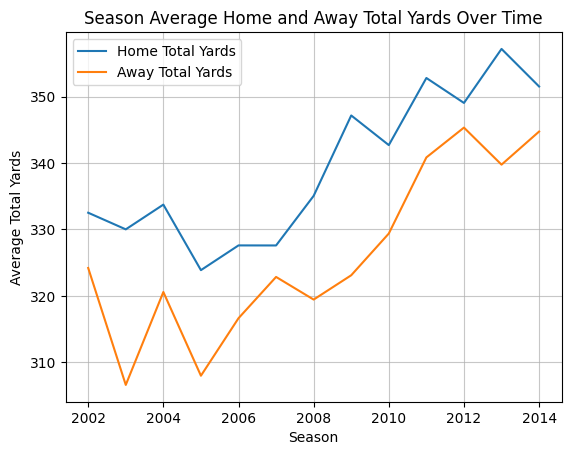

In [25]:
# Now, lets produce a line plot of season average home and away total yards over time
grouped_data = nfl_regseason.groupby("season")[["HtotalYds", "AtotalYds"]].mean()

plt.plot(grouped_data.index, grouped_data["HtotalYds"], label="Home Total Yards")
plt.plot(grouped_data.index, grouped_data["AtotalYds"], label="Away Total Yards")
plt.xlabel("Season")
plt.ylabel("Average Total Yards")
plt.title("Season Average Home and Away Total Yards Over Time")
plt.legend()
plt.grid(True, alpha=0.7)
plt.show()

From this graph, we can see an upward trend in average total yards over a season for both home and away teams. Also, for each season average home total yards are higher than average away yards by a large margin. This could provide evidence of a home crowd advantage.

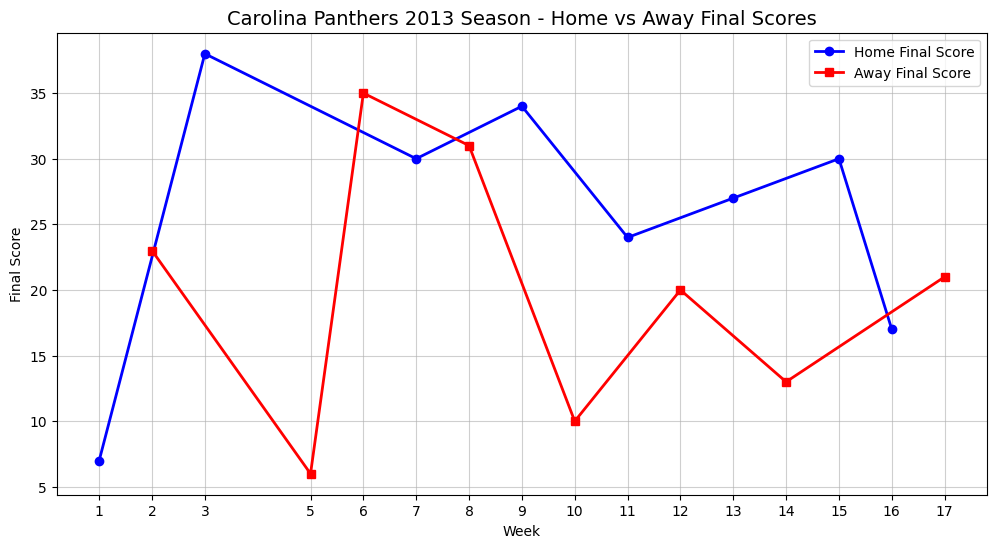

In [34]:
# We could also focus on a statistic of a particular team over a singular season
# Lets look at a plot of home and away point totals (HFinal and AFinal) for the Carolina Panthers in 2013 by week
panthers_2013 = nfl_regseason[
    (nfl_regseason['season'] == 2013) &
    ((nfl_regseason['homeTeam'] == 'Carolina Panthers') |
        (nfl_regseason['awayTeam'] == 'Carolina Panthers')
    )
].copy()

panthers_2013['panthers_score'] = np.where(
    panthers_2013['homeTeam'] == 'Carolina Panthers',
    panthers_2013['HFinal'],
    panthers_2013['AFinal']
)

home_games = panthers_2013[panthers_2013['homeTeam'] == 'Carolina Panthers'].sort_values('week')
away_games = panthers_2013[panthers_2013['awayTeam'] == 'Carolina Panthers'].sort_values('week')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(home_games['week'], home_games['HFinal'],
        marker='o', label='Home Final Score', color='blue', linewidth=2)

ax.plot(away_games['week'], away_games['AFinal'],
        marker='s', label='Away Final Score', color='red', linewidth=2)

ax.set_title('Carolina Panthers 2013 Season - Home vs Away Final Scores', fontsize=14)
ax.set_xlabel('Week')
ax.set_ylabel('Final Score')
ax.set_xticks(panthers_2013['week'].sort_values().unique())
ax.legend()
ax.grid(True, alpha=0.6)
plt.show()

We can see that the Panthers points scored varied wildly over the 2013 season, with a minimum of 6 points, and a maximum of over 35 points. Generally, the Panthers also scored more points at home than away, especially towards the end of the season.

### Function Writing

In [35]:
# Now, lets try writing a function that inputs a team and season, and produces a line graph of that teams final score each week for that season

# Import timeit wrapper
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f"\n'{func.__name__}' ran in {end - start:.4f} seconds")
        return result
    return wrapper

# Function
@timeit
def plot_team_scores(team_name, season, df):
    """
    Plots home and away final scores for a given NFL team and season.

    Parameters:
        team_name (str): Full team name e.g. 'Carolina Panthers'
        season (int): Season year between 2002 and 2014
        df (DataFrame): The nfl_regseason DataFrame
    """
    if season not in range(2002, 2015):
        print("Season must be between 2002 and 2014.")
        return

    available_teams = pd.concat([df['homeTeam'], df['awayTeam']]).unique()
    if team_name not in available_teams:
        print(f"Team '{team_name}' not found.")
        print("Available teams:", sorted(available_teams))
        return

    # Filter data
    team_games = df[
        (df['season'] == season) &
        ((df['homeTeam'] == team_name) | (df['awayTeam'] == team_name))
    ].copy()

    if team_games.empty:
        print(f"No games found for {team_name} in the {season} season.")
        return

    home_games = team_games[team_games['homeTeam'] == team_name].sort_values('week')
    away_games = team_games[team_games['awayTeam'] == team_name].sort_values('week')

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    if not home_games.empty:
        ax.plot(home_games['week'], home_games['HFinal'],
                marker='o', label='Home Score', color='blue', linewidth=2)

    if not away_games.empty:
        ax.plot(away_games['week'], away_games['AFinal'],
                marker='s', label='Away Score', color='red', linewidth=2)

    ax.set_title(f'{team_name} {season} Season - Home vs Away Final Scores', fontsize=14)
    ax.set_xlabel('Week')
    ax.set_ylabel('Final Score')
    ax.set_xticks(sorted(team_games['week'].unique()))
    ax.legend()
    ax.grid(True, alpha=0.6)
    plt.tight_layout()
    plt.show()



Now, lets try it for a few combinations of teams and seasons!

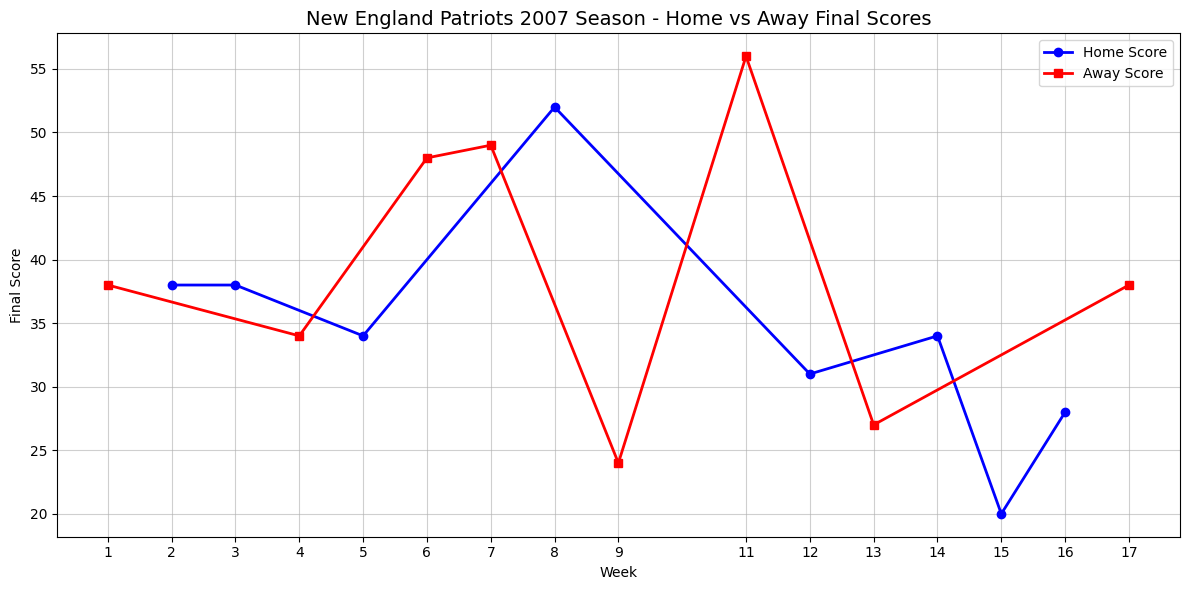


'plot_team_scores' ran in 0.2657 seconds


In [36]:
plot_team_scores('New England Patriots', 2007, nfl_regseason)

This is the line graph for the Patriots infamous 2007 season, where they went undefeated in the regular season, scoring at least 20 points every week, and over 35 points in 8 weeks. There aren't any clear differences in points scored at home vs away.

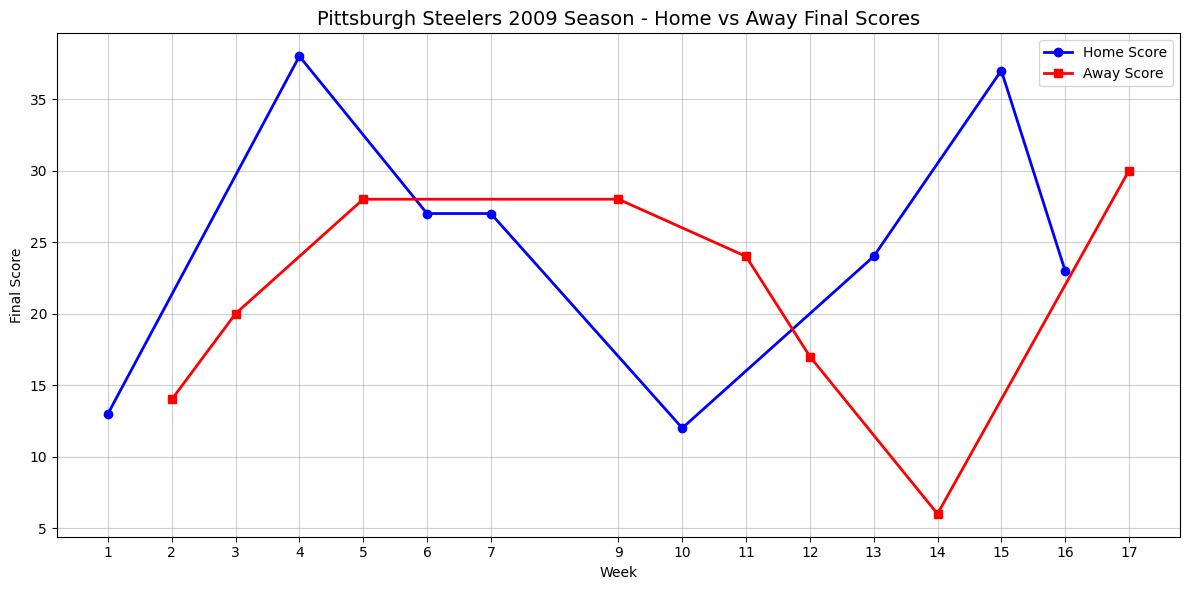


'plot_team_scores' ran in 0.2560 seconds


In [38]:
plot_team_scores('Pittsburgh Steelers', 2009, nfl_regseason)

This is a line graph for the Steelers 2009 season. For additional context, they went 12-4 and ended the season with a Super Bowl victory. The Steelers only had one game scoring below 10 points in the regular season, and seemed to perform about the same at home vs on the road.

In [39]:
plot_team_scores('Cincinnati Bengals', 2021, nfl_regseason)

Season must be between 2002 and 2014.

'plot_team_scores' ran in 0.0001 seconds


In [40]:
plot_team_scores('Las Vegas Raiders', 2010, nfl_regseason)

Team 'Las Vegas Raiders' not found.
Available teams: ['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers', 'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Kansas City Chiefs', 'Miami Dolphins', 'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'New York Giants', 'New York Jets', 'Oakland Raiders', 'Philadelphia Eagles', 'Pittsburgh Steelers', 'San Diego Chargers', 'San Francisco 49ers', 'Seattle Seahawks', 'St. Louis Rams', 'Tampa Bay Buccaneers', 'Tennessee Titans', 'Washington Redskins']

'plot_team_scores' ran in 0.0039 seconds


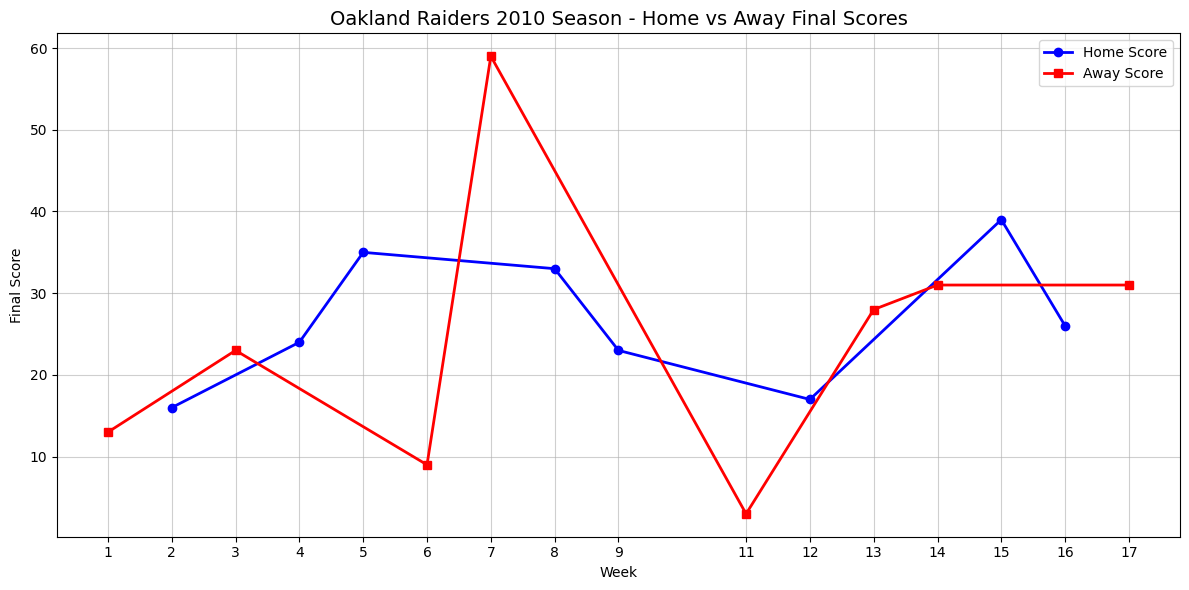


'plot_team_scores' ran in 0.2822 seconds


In [41]:
plot_team_scores('Oakland Raiders', 2010, nfl_regseason)

This is the Raiders points scored per week in the 2010 season, in which they went 8-8. They had some very mixed results, scoring 3 points in week 11, and nearly 60 points in week 7, both away!